In [1]:
import yfinance as yf
from full_fred.fred import Fred
from datetime import datetime, timedelta
import os


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as pdr
from pandas.plotting import lag_plot

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.ar_model import AR


import statsmodels

In [2]:
SPTL = yf.download("SPTL",start='2014-01-01',end='2019-12-31')
display(SPTL)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,29.924999,30.070000,29.924999,30.055000,23.299051,25400
2014-01-03,29.959999,30.105000,29.959999,30.035000,23.283531,22000
2014-01-06,30.110001,30.270000,30.110001,30.160000,23.380442,3200
2014-01-07,30.240000,30.260000,30.200001,30.260000,23.457964,3800
2014-01-08,30.075001,30.184999,30.075001,30.150000,23.372704,14800
...,...,...,...,...,...,...
2019-12-23,39.290001,39.320000,39.060001,39.160000,35.542130,419900
2019-12-24,39.029999,39.330002,39.020000,39.290001,35.660107,164100
2019-12-26,39.320000,39.400002,39.200001,39.389999,35.750874,242300


In [3]:
SPTL = yf.download("SPTL",start='2014-01-01',end='2020-01-01')
display(SPTL)

os.environ['FRED_API_KEY'] = '8e4d8c1d9941be8f9ced393f0df6b3de'
fred = Fred()
fred.env_api_key_found()
EFFR = fred.get_series_df('EFFR',observation_start='2014-01-01',observation_end='2019-12-31')
EFFR = EFFR.rename(columns={'date':'Date','value':'EFFR'})
EFFR.index = pd.to_datetime(EFFR['Date'])
EFFR = EFFR.drop(columns=['realtime_start','realtime_end','Date'])
EFFR = EFFR.replace('.',np.nan)
EFFR = EFFR.dropna()
display(EFFR)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,29.924999,30.070000,29.924999,30.055000,23.299049,25400
2014-01-03,29.959999,30.105000,29.959999,30.035000,23.283539,22000
2014-01-06,30.110001,30.270000,30.110001,30.160000,23.380447,3200
2014-01-07,30.240000,30.260000,30.200001,30.260000,23.457970,3800
2014-01-08,30.075001,30.184999,30.075001,30.150000,23.372700,14800
...,...,...,...,...,...,...
2019-12-24,39.029999,39.330002,39.020000,39.290001,35.660118,164100
2019-12-26,39.320000,39.400002,39.200001,39.389999,35.750877,242300
2019-12-27,39.459999,39.509998,39.419998,39.419998,35.778095,155700


,EFFR
Date,
2014-01-02,0.08
2014-01-03,0.08
2014-01-06,0.08
2014-01-07,0.07
2014-01-08,0.07
...,...
2019-12-24,1.55
2019-12-26,1.55
2019-12-27,1.55


In [4]:
All = pd.merge(SPTL,EFFR,on='Date')
display(All)

,Open,High,Low,Close,Adj Close,Volume,EFFR
Date,,,,,,,
2014-01-02,29.924999,30.070000,29.924999,30.055000,23.299049,25400,0.08
2014-01-03,29.959999,30.105000,29.959999,30.035000,23.283539,22000,0.08
2014-01-06,30.110001,30.270000,30.110001,30.160000,23.380447,3200,0.08
2014-01-07,30.240000,30.260000,30.200001,30.260000,23.457970,3800,0.07
2014-01-08,30.075001,30.184999,30.075001,30.150000,23.372700,14800,0.07
...,...,...,...,...,...,...,...
2019-12-24,39.029999,39.330002,39.020000,39.290001,35.660118,164100,1.55
2019-12-26,39.320000,39.400002,39.200001,39.389999,35.750877,242300,1.55
2019-12-27,39.459999,39.509998,39.419998,39.419998,35.778095,155700,1.55


In [5]:
# Calculate the Daily EFFR
All['EFFR'] = pd.to_numeric(All['EFFR'],errors='coerce')
All['EFFR'] = All['EFFR']/100   # Calculate with percentage
All['EFFR Daily'] = All['EFFR']/252

In [6]:
# Calculate the return Of SPTL
All['SPTL Daily_Return'] = All['Close'].pct_change()
All['SPTL Excess_Return'] = All['SPTL Daily_Return']-All['EFFR Daily']

In [7]:
display(All)

,Open,High,Low,Close,Adj Close,Volume,EFFR,EFFR Daily,SPTL Daily_Return,SPTL Excess_Return
Date,,,,,,,,,,
2014-01-02,29.924999,30.070000,29.924999,30.055000,23.299049,25400,0.0008,0.000003,NaN,NaN
2014-01-03,29.959999,30.105000,29.959999,30.035000,23.283539,22000,0.0008,0.000003,-0.000665,-0.000669
2014-01-06,30.110001,30.270000,30.110001,30.160000,23.380447,3200,0.0008,0.000003,0.004162,0.004159
2014-01-07,30.240000,30.260000,30.200001,30.260000,23.457970,3800,0.0007,0.000003,0.003316,0.003313
2014-01-08,30.075001,30.184999,30.075001,30.150000,23.372700,14800,0.0007,0.000003,-0.003635,-0.003638
...,...,...,...,...,...,...,...,...,...,...
2019-12-24,39.029999,39.330002,39.020000,39.290001,35.660118,164100,0.0155,0.000062,0.003320,0.003258
2019-12-26,39.320000,39.400002,39.200001,39.389999,35.750877,242300,0.0155,0.000062,0.002545,0.002484
2019-12-27,39.459999,39.509998,39.419998,39.419998,35.778095,155700,0.0155,0.000062,0.000762,0.000700


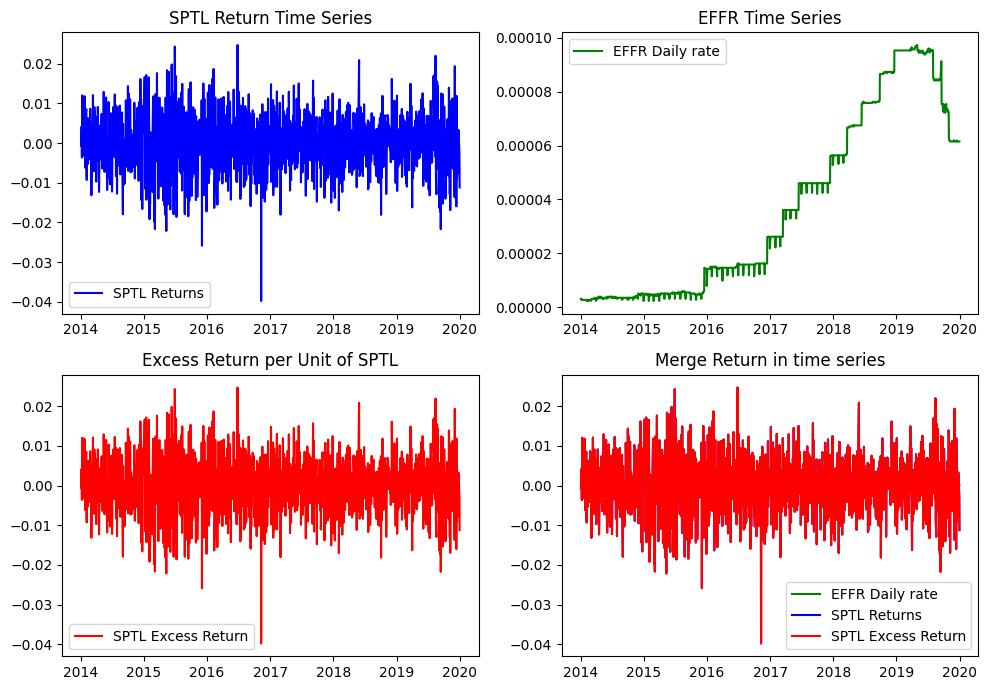

In [8]:
# Plot the return time series
plt.figure(figsize=(10, 7))

# Plot SPTL Return
plt.subplot(2, 2, 1)
plt.plot(All.index, All['SPTL Daily_Return'], label='SPTL Returns', color='blue')
plt.title('SPTL Return Time Series')
plt.legend()

# Plot EFFR Daily return
plt.subplot(2, 2, 2)
plt.plot(All.index, All['EFFR Daily'], label='EFFR Daily rate', color='green')
plt.title('EFFR Time Series')
plt.legend()


# Plot excess return per unit of SPTL
plt.subplot(2, 2, 3)
plt.plot(All.index, All['SPTL Excess_Return'], label='SPTL Excess Return', color='red')
plt.title('Excess Return per Unit of SPTL')
plt.legend()


# Plot return in time series
plt.subplot(2, 2, 4)
plt.plot(All.index, All['EFFR Daily'], label='EFFR Daily rate', color='green')
plt.plot(All.index, All['SPTL Daily_Return'], label='SPTL Returns', color='blue')
plt.plot(All.index, All['SPTL Excess_Return'], label='SPTL Excess Return', color='red')
plt.title('Merge Return in time series')
plt.legend()


# Adjust layout
plt.tight_layout()
plt.legend()

# Show plot
plt.show()

# 2. Trading Strategies


In [9]:
# 计算EMA8
#All['EMA'] = All['Close'].ewm(span=10, adjust=False).mean()
All['MA'] = All['Close'].rolling(window=10).mean()

display(All)

,Open,High,Low,Close,Adj Close,Volume,EFFR,EFFR Daily,SPTL Daily_Return,SPTL Excess_Return,MA
Date,,,,,,,,,,,
2014-01-02,29.924999,30.070000,29.924999,30.055000,23.299049,25400,0.0008,0.000003,NaN,NaN,NaN
2014-01-03,29.959999,30.105000,29.959999,30.035000,23.283539,22000,0.0008,0.000003,-0.000665,-0.000669,NaN
2014-01-06,30.110001,30.270000,30.110001,30.160000,23.380447,3200,0.0008,0.000003,0.004162,0.004159,NaN
2014-01-07,30.240000,30.260000,30.200001,30.260000,23.457970,3800,0.0007,0.000003,0.003316,0.003313,NaN
2014-01-08,30.075001,30.184999,30.075001,30.150000,23.372700,14800,0.0007,0.000003,-0.003635,-0.003638,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,39.029999,39.330002,39.020000,39.290001,35.660118,164100,0.0155,0.000062,0.003320,0.003258,39.472
2019-12-26,39.320000,39.400002,39.200001,39.389999,35.750877,242300,0.0155,0.000062,0.002545,0.002484,39.401
2019-12-27,39.459999,39.509998,39.419998,39.419998,35.778095,155700,0.0155,0.000062,0.000762,0.000700,39.397


In [10]:
# Prepare Initial data
Initial_capacity = 200000
Leverage = 10
loss_ratio = 0.95
profit_ratio = 1.5

In [11]:
# Prepare data
OrderTracking1= All[['Close','EFFR Daily']]
OrderTracking1.reset_index(inplace=True)
OrderTracking2 = All[['Close','EFFR Daily']]
OrderTracking2.reset_index(inplace=True)

OrderTracking3 = All[['Close','EFFR Daily']]
OrderTracking3.reset_index(inplace=True)

all_train_data = all.head(int(len(OrderTracking3)*(0.7)))
all_test_data = all.drop(all_train_data.index)



In [12]:
# clean the Leverage
def CleanLeverage(value):
    Cash = value - 1800000
    if Cash>0:
        return (Cash)
    else: return (-1000)

# Trend Following (Only long)

In [13]:
def Trend(dataframe,initial_capacity,Leverage,MAtimeWindow):
    # initial the parameters
    #dataframe['Cash'] = initial_capacity
    dataframe['LeverageCash'] = initial_capacity * Leverage
    dataframe['Action'] = 0
    dataframe['Quantity']= 0
    dataframe['StockValue'] = dataframe['Quantity']*dataframe['Close']
    MASum = [0]
    BuyVolumeRatio = 1
    
    for i, row in dataframe.iterrows():
        # Calculate the MA 
        MASum.append(MASum[i]+row['Close'])
        dataframe.loc[i,'MA'] = row['Close']
        if i >= MAtimeWindow:
            dataframe.loc[i,'MA'] = (MASum[i] - MASum[i - MAtimeWindow]) / MAtimeWindow
            #dataframe.loc[i,'MA'] = (dataframe.loc[i,'MAS'] - dataframe.loc[(i - MAtimeWindow),'MAS']) / MAtimeWindow
        
        # MA lower than the close price then buy the volume
        if dataframe.loc[i,'MA'] < dataframe.loc[i,'Close']:
            # tormorrow will buy the stock
            dataframe.loc[i+1,'Action'] = 1
            
            # Buy stock process
            if dataframe.loc[i,'Action'] == 1:
                dataframe.loc[i+1,'Action'] = 2
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'LeverageCash']//dataframe.loc[i,'Close']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash'] - dataframe.loc[i,'StockValue']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
   
            # Hold stock process           
            elif dataframe.loc[i,'Action'] == 2:
                dataframe.loc[i+1,'Action'] = 2
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
            # Sell stock, start holding cash
            elif dataframe.loc[i,'Action'] == -1:
                dataframe.loc[i+1,'Action'] = 1
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'] + dataframe.loc[i-1,'LeverageCash']
                dataframe.loc[i,'Quantity'] = 0
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                # Need Clear the learvage
                #dataframe.loc[i,'Cash'] = CleanLeverage(dataframe.loc[i,'LeverageCash'])
                #dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'Cash'] * 10
                
            # Hold Cash 
            elif dataframe.loc[i,'Action'] == -2:
                dataframe.loc[i+1,'Action'] = 1
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']

            # otherwise keep the current cash
            else:
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
        # MA higher than the close price then Sell the volume
        if dataframe.loc[i,'MA'] > dataframe.loc[i,'Close']:
            # tormorrow will sell the stock
            dataframe.loc[i+1,'Action'] = -1
            # Sell the stock, Hold the Cash
            if dataframe.loc[i,'Action'] == -1:
                dataframe.loc[i+1,'Action'] = -2
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'] + dataframe.loc[i-1,'LeverageCash']
                dataframe.loc[i,'Quantity'] = 0
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                # Need Clear the learvage
                #dataframe.loc[i,'Cash'] = CleanLeverage(dataframe.loc[i,'LeverageCash'])
                #dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'Cash'] * 10
                
            # Hold Cash
            elif dataframe.loc[i,'Action'] == -2:
                dataframe.loc[i+1,'Action'] = -2
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']  
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
            # Buy stock 
            elif dataframe.loc[i,'Action'] == 1:
                dataframe.loc[i+1,'Action'] = -1
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'LeverageCash']//dataframe.loc[i,'Close']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']-dataframe.loc[i,'StockValue']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
            # Hold stock            
            elif dataframe.loc[i,'Action'] == 2:
                dataframe.loc[i+1,'Action'] = -1
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
            # otherwise keeping current value
            else:
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']

        # MA Same as the close price then keep the volume
        if dataframe.loc[i,'MA'] == dataframe.loc[i,'Close']:
            dataframe.loc[i+1,'Action'] = 0
            #dataframe.loc[i,'Cash'] = initial_capacity
            dataframe.loc[i,'LeverageCash'] = initial_capacity * Leverage
            dataframe.loc[i,'Quantity']= 0
            dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity']*dataframe.loc[i,'Close']
        
        dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i,'StockValue'] + dataframe.loc[i,'LeverageCash']
    return dataframe


OrderTracking1 = Trend(OrderTracking1,200000,10,10)

/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_6866/2414566806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['LeverageCash'] = initial_capacity * Leverage
/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_6866/2414566806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Action'] = 0
/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_6866/2414566806.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

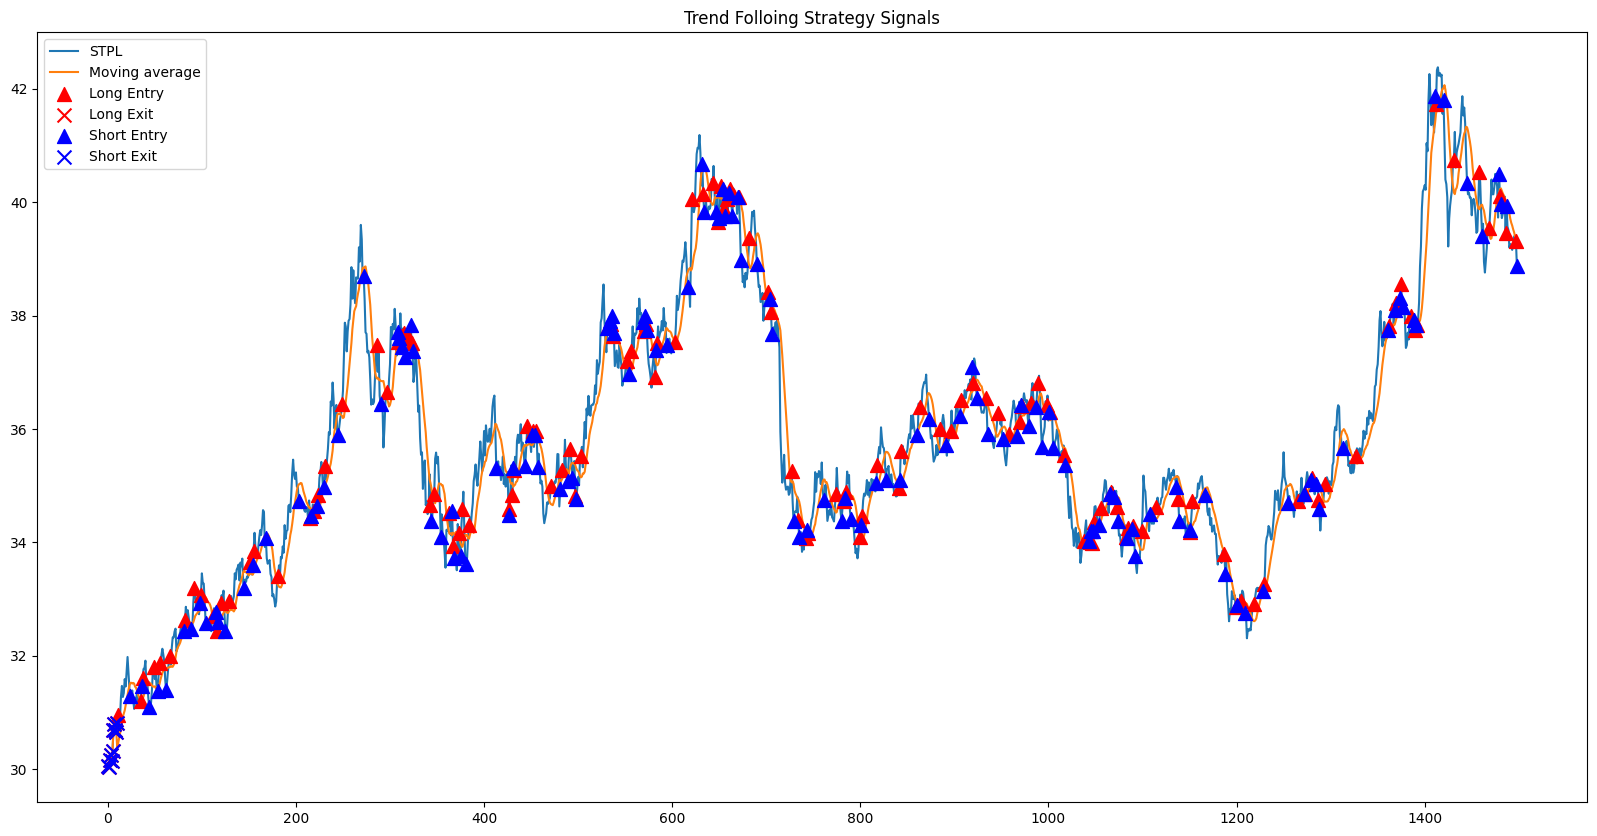

In [14]:
def plot_bands_with_signal(df):
    # 绘制交易图表
    #买入开仓
    long_entry = df.loc[df['Action']==1]['Close']
    #卖出平仓
    long_exit = df.loc[df['Action']==0]['Close']
    #卖出开仓
    short_entry = df.loc[df['Action']==-1]['Close']
    #卖出平仓
    short_exit = df.loc[df['Action']==0]['Close']
        
    fig, ax = plt.subplots(1, figsize=(20, 10), sharex=True)   
    ax.plot(df['Close'],label = 'STPL')
    ax.plot(df['MA'], label='Moving average')
    
    ax.scatter(long_entry.index, long_entry, color='r', 
               s=100, marker='^', label='Long Entry',
               zorder=10)
    ax.scatter(long_exit.index, long_exit, color='r',
               s=100, marker='x', label='Long Exit',
               zorder=10)
    ax.scatter(short_entry.index, short_entry, color='b', 
               s=100, marker='^', label='Short Entry',
               zorder=10)
    ax.scatter(short_exit.index, short_exit, color='b',
               s=100, marker='x', label='Short Exit',
               zorder=10)
    ax.set_title('Trend Folloing Strategy Signals')
    ax.legend()
    plt.show()
    
plot_bands_with_signal(OrderTracking1)

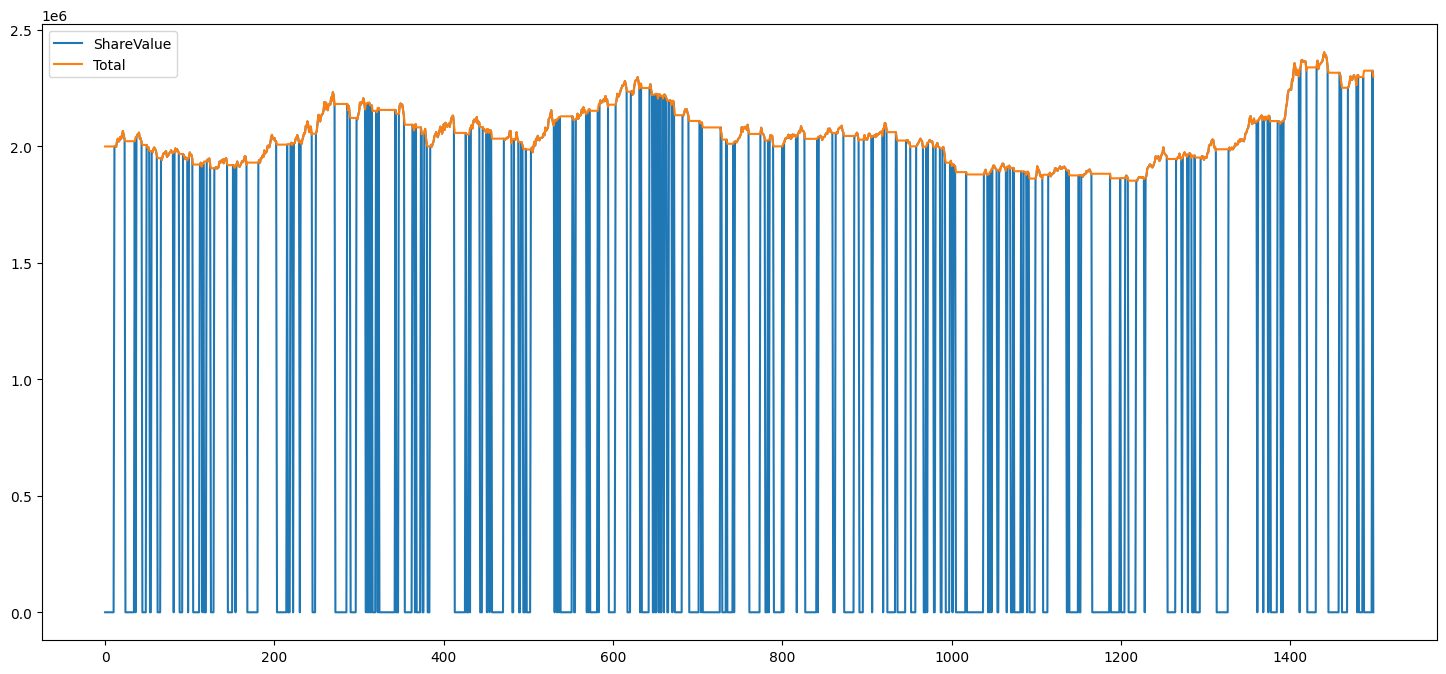

In [15]:
plt.figure(figsize=(18,8))

plt.plot(OrderTracking1['StockValue'],label='ShareValue')
plt.plot(OrderTracking1['TotalValue(Leverage)'],label='Total')
#plt.axhline(y=2000000,color='red',linestyle='--')
plt.legend()
plt.show()

# Trend Following with long and short 


In [16]:
def Trend(dataframe,initial_capacity,Leverage,MAtimeWindow):
    # initial the parameters
    #dataframe['Cash'] = initial_capacity
    dataframe['LeverageCash'] = initial_capacity * Leverage
    dataframe['Action'] = 0
    dataframe['Quantity']= 0
    dataframe['StockValue'] = 0

    MASum = [0]
    BuyVolumeRatio = 1    
    
    for i, row in dataframe.iterrows():
        # Calculate the MA 
        MASum.append(MASum[i]+row['Close'])
        dataframe.loc[i,'MA'] = row['Close']
        if i >= MAtimeWindow:
            dataframe.loc[i,'MA'] = (MASum[i] - MASum[i - MAtimeWindow]) / MAtimeWindow
        
        # MA lower than the close price then buy the volume
        if dataframe.loc[i,'MA'] < dataframe.loc[i,'Close']:
            # tormorrow will buy the stock
            dataframe.loc[i+1,'Action'] = 1
            
            # Buy stock process
            if dataframe.loc[i,'Action'] == 1:
                dataframe.loc[i+1,'Action'] = 2
                # clear short
                dataframe.loc[i,'StockValue'] = -(dataframe.loc[i-1,'StockValue'] - dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'])
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash'] + dataframe.loc[i,'StockValue']
                
                # buy stock
                dataframe.loc[i,'Quantity'] = dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'LeverageCash'] - dataframe.loc[i,'StockValue']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
   
            # Hold stock process           
            elif dataframe.loc[i,'Action'] == 2:
                dataframe.loc[i+1,'Action'] = 2
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
                
            # Sell stock, start holding cash
            elif dataframe.loc[i,'Action'] == -1:
                dataframe.loc[i+1,'Action'] = 1
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'] + dataframe.loc[i-1,'LeverageCash']
                dataframe.loc[i,'Quantity'] = 0
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']

                # Go short
                dataframe.loc[i,'Quantity'] = (-(dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']))
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity']*dataframe.loc[i,'Close']
                
                
            # Hold Cash 
            elif dataframe.loc[i,'Action'] == -2:
                dataframe.loc[i+1,'Action'] = 1
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                         
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']

            # otherwise keep the current cash
            else:
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
    
                
        # MA higher than the close price then Sell the volume
        if dataframe.loc[i,'MA'] > dataframe.loc[i,'Close']:
            # tormorrow will sell the stock
            dataframe.loc[i+1,'Action'] = -1
            # Sell the stock, Hold the Cash
            if dataframe.loc[i,'Action'] == -1:
                dataframe.loc[i+1,'Action'] = -2
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'] + dataframe.loc[i-1,'LeverageCash']
                dataframe.loc[i,'Quantity'] = 0
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']

                
                # Go short
                dataframe.loc[i,'Quantity'] = (-(dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']))
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity']*dataframe.loc[i,'Close']
                
            # Hold Cash
            elif dataframe.loc[i,'Action'] == -2:
                dataframe.loc[i+1,'Action'] = -2
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']  
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
                
                
            # Buy stock 
            elif dataframe.loc[i,'Action'] == 1:
                dataframe.loc[i+1,'Action'] = -1
                
                # clear short
                dataframe.loc[i,'StockValue'] = -(dataframe.loc[i-1,'StockValue'] - dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'])
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']+dataframe.loc[i,'StockValue'] 


                # buy stock
                dataframe.loc[i,'Quantity'] = dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'LeverageCash']-dataframe.loc[i,'StockValue']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
            # Hold stock            
            elif dataframe.loc[i,'Action'] == 2:
                dataframe.loc[i+1,'Action'] = -1
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
                
            # otherwise keeping current value
            else:
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']


        # MA Same as the close price then keep the volume
        if dataframe.loc[i,'MA'] == dataframe.loc[i,'Close']:
            dataframe.loc[i+1,'Action'] = 0
            #dataframe.loc[i,'Cash'] = initial_capacity
            dataframe.loc[i,'LeverageCash'] = initial_capacity * Leverage
            dataframe.loc[i,'Quantity']= 0
            dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']

        if dataframe.loc[i,'StockValue']>0:
            dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i,'StockValue'] + dataframe.loc[i,'LeverageCash']
        elif dataframe.loc[i,'StockValue']<0:
            dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i-1,'TotalValue(Leverage)']
        else: dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i,'StockValue'] + dataframe.loc[i,'LeverageCash']


    return dataframe


OrderTracking2 = Trend(OrderTracking2,200000,10,10)
OrderTracking2.drop(index=OrderTracking2.index[-1],axis=0,inplace=True)


/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_6866/494688760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['LeverageCash'] = initial_capacity * Leverage
/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_6866/494688760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Action'] = 0
/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_6866/494688760.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

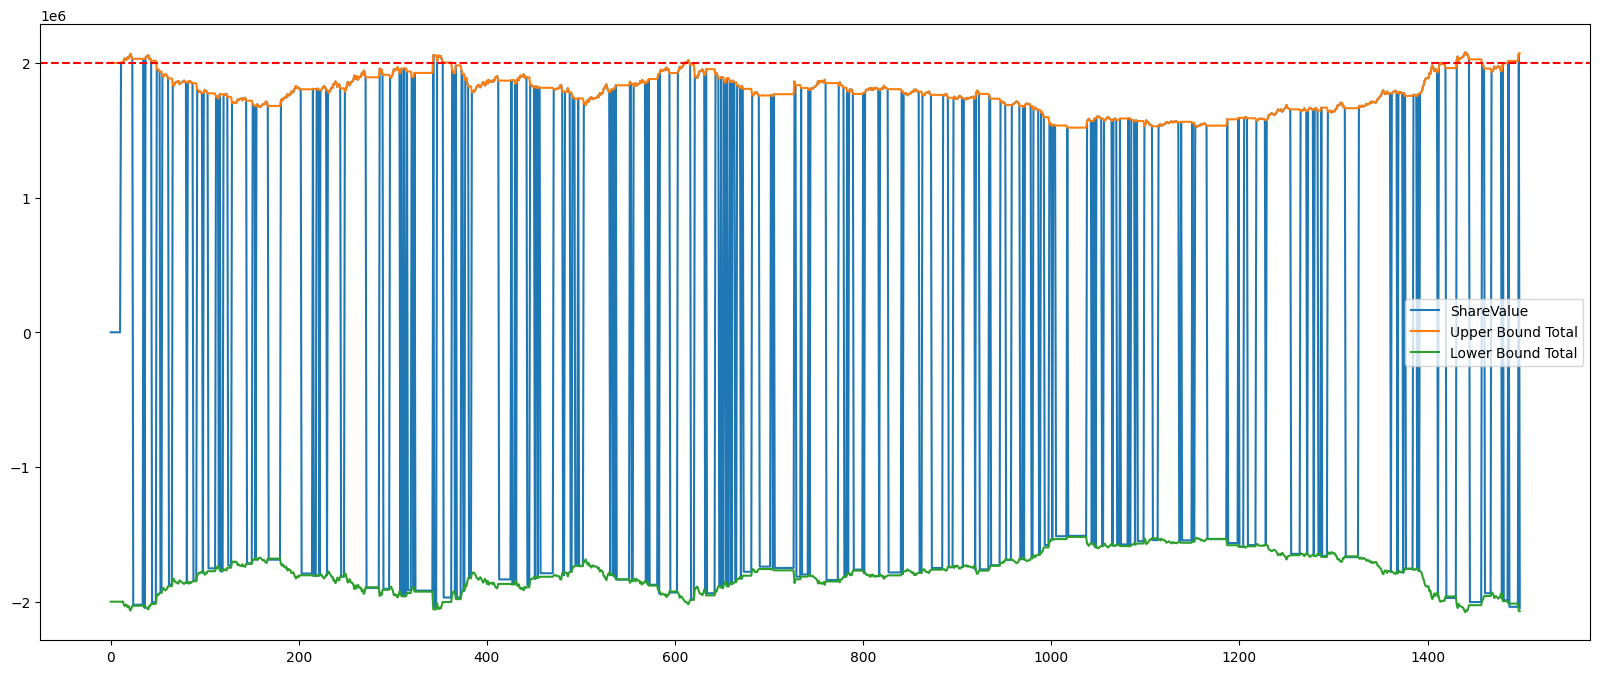

In [17]:
plt.figure(figsize=(20,8))

plt.plot(OrderTracking2['StockValue'],label='ShareValue')
plt.plot(OrderTracking2['TotalValue(Leverage)'],label='Upper Bound Total')
plt.plot(-OrderTracking2['TotalValue(Leverage)'],label='Lower Bound Total')

plt.axhline(y=2000000,color='red',linestyle='--')
plt.legend()
plt.show()

# Mean Reversion (Only long)

In [18]:
def Trend(dataframe,initial_capacity,Leverage,MAtimeWindow):
    # initial the parameters
    #dataframe['Cash'] = initial_capacity
    dataframe['LeverageCash'] = initial_capacity * Leverage
    dataframe['Action'] = 0
    dataframe['Quantity']= 0
    dataframe['StockValue'] = dataframe['Quantity']*dataframe['Close']
    MASum = [0]
    BuyVolumeRatio = 1
    
    for i, row in dataframe.iterrows():
        # Calculate the MA 
        MASum.append(MASum[i]+row['Close'])
        dataframe.loc[i,'MA'] = row['Close']
        if i >= MAtimeWindow:
            dataframe.loc[i,'MA'] = (MASum[i] - MASum[i - MAtimeWindow]) / MAtimeWindow
            #dataframe.loc[i,'MA'] = (dataframe.loc[i,'MAS'] - dataframe.loc[(i - MAtimeWindow),'MAS']) / MAtimeWindow
        
        # MA lower than the close price then buy the volume
        if dataframe.loc[i,'MA'] > dataframe.loc[i,'Close']:
            # tormorrow will buy the stock
            dataframe.loc[i+1,'Action'] = 1
            
            # Buy stock process
            if dataframe.loc[i,'Action'] == 1:
                dataframe.loc[i+1,'Action'] = 2
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'LeverageCash']//dataframe.loc[i,'Close']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash'] - dataframe.loc[i,'StockValue']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
   
            # Hold stock process           
            elif dataframe.loc[i,'Action'] == 2:
                dataframe.loc[i+1,'Action'] = 2
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
            # Sell stock, start holding cash
            elif dataframe.loc[i,'Action'] == -1:
                dataframe.loc[i+1,'Action'] = 1
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'] + dataframe.loc[i-1,'LeverageCash']
                dataframe.loc[i,'Quantity'] = 0
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                # Need Clear the learvage
                #dataframe.loc[i,'Cash'] = CleanLeverage(dataframe.loc[i,'LeverageCash'])
                #dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'Cash'] * 10
                
            # Hold Cash 
            elif dataframe.loc[i,'Action'] == -2:
                dataframe.loc[i+1,'Action'] = 1
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']

            # otherwise keep the current cash
            else:
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
        # MA higher than the close price then Sell the volume
        if dataframe.loc[i,'MA'] < dataframe.loc[i,'Close']:
            # tormorrow will sell the stock
            dataframe.loc[i+1,'Action'] = -1
            # Sell the stock, Hold the Cash
            if dataframe.loc[i,'Action'] == -1:
                dataframe.loc[i+1,'Action'] = -2
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'] + dataframe.loc[i-1,'LeverageCash']
                dataframe.loc[i,'Quantity'] = 0
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                # Need Clear the learvage
                #dataframe.loc[i,'Cash'] = CleanLeverage(dataframe.loc[i,'LeverageCash'])
                #dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'Cash'] * 10
                
            # Hold Cash
            elif dataframe.loc[i,'Action'] == -2:
                dataframe.loc[i+1,'Action'] = -2
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']  
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
            # Buy stock 
            elif dataframe.loc[i,'Action'] == 1:
                dataframe.loc[i+1,'Action'] = -1
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'LeverageCash']//dataframe.loc[i,'Close']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']-dataframe.loc[i,'StockValue']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
            # Hold stock            
            elif dataframe.loc[i,'Action'] == 2:
                dataframe.loc[i+1,'Action'] = -1
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
            # otherwise keeping current value
            else:
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']

        # MA Same as the close price then keep the volume
        if dataframe.loc[i,'MA'] == dataframe.loc[i,'Close']:
            dataframe.loc[i+1,'Action'] = 0
            #dataframe.loc[i,'Cash'] = initial_capacity
            dataframe.loc[i,'LeverageCash'] = initial_capacity * Leverage
            dataframe.loc[i,'Quantity']= 0
            dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity']*dataframe.loc[i,'Close']
        
        dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i,'StockValue'] + dataframe.loc[i,'LeverageCash']
    return dataframe


OrderTracking1 = Trend(OrderTracking1,200000,10,10)

/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_6866/726582690.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '23.948749542236328' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash'] - dataframe.loc[i,'StockValue']


# Mean Reversion Long and short

In [19]:
def Trend(dataframe,initial_capacity,Leverage,MAtimeWindow):
    # initial the parameters
    #dataframe['Cash'] = initial_capacity
    dataframe['LeverageCash'] = initial_capacity * Leverage
    dataframe['Action'] = 0
    dataframe['Quantity']= 0
    dataframe['StockValue'] = 0

    MASum = [0]
    BuyVolumeRatio = 1    
    
    for i, row in dataframe.iterrows():
        # Calculate the MA 
        MASum.append(MASum[i]+row['Close'])
        dataframe.loc[i,'MA'] = row['Close']
        if i >= MAtimeWindow:
            dataframe.loc[i,'MA'] = (MASum[i] - MASum[i - MAtimeWindow]) / MAtimeWindow
        
        # MA lower than the close price then buy the volume
        if dataframe.loc[i,'MA'] > dataframe.loc[i,'Close']:
            # tormorrow will buy the stock
            dataframe.loc[i+1,'Action'] = 1
            
            # Buy stock process
            if dataframe.loc[i,'Action'] == 1:
                dataframe.loc[i+1,'Action'] = 2
                # clear short
                dataframe.loc[i,'StockValue'] = -(dataframe.loc[i-1,'StockValue'] - dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'])
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash'] + dataframe.loc[i,'StockValue']
                
                # buy stock
                dataframe.loc[i,'Quantity'] = dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'LeverageCash'] - dataframe.loc[i,'StockValue']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
   
            # Hold stock process           
            elif dataframe.loc[i,'Action'] == 2:
                dataframe.loc[i+1,'Action'] = 2
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
                
            # Sell stock, start holding cash
            elif dataframe.loc[i,'Action'] == -1:
                dataframe.loc[i+1,'Action'] = 1
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'] + dataframe.loc[i-1,'LeverageCash']
                dataframe.loc[i,'Quantity'] = 0
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']

                # Go short
                dataframe.loc[i,'Quantity'] = (-(dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']))
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity']*dataframe.loc[i,'Close']
                
                
            # Hold Cash 
            elif dataframe.loc[i,'Action'] == -2:
                dataframe.loc[i+1,'Action'] = 1
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                         
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']

            # otherwise keep the current cash
            else:
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
    
                
        # MA higher than the close price then Sell the volume
        if dataframe.loc[i,'MA'] < dataframe.loc[i,'Close']:
            # tormorrow will sell the stock
            dataframe.loc[i+1,'Action'] = -1
            # Sell the stock, Hold the Cash
            if dataframe.loc[i,'Action'] == -1:
                dataframe.loc[i+1,'Action'] = -2
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'] + dataframe.loc[i-1,'LeverageCash']
                dataframe.loc[i,'Quantity'] = 0
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']

                
                # Go short
                dataframe.loc[i,'Quantity'] = (-(dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']))
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity']*dataframe.loc[i,'Close']
                
            # Hold Cash
            elif dataframe.loc[i,'Action'] == -2:
                dataframe.loc[i+1,'Action'] = -2
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']  
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
                
                
            # Buy stock 
            elif dataframe.loc[i,'Action'] == 1:
                dataframe.loc[i+1,'Action'] = -1
                
                # clear short
                dataframe.loc[i,'StockValue'] = -(dataframe.loc[i-1,'StockValue'] - dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'])
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']+dataframe.loc[i,'StockValue'] 


                # buy stock
                dataframe.loc[i,'Quantity'] = dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'LeverageCash']-dataframe.loc[i,'StockValue']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
            # Hold stock            
            elif dataframe.loc[i,'Action'] == 2:
                dataframe.loc[i+1,'Action'] = -1
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
                
            # otherwise keeping current value
            else:
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']


        # MA Same as the close price then keep the volume
        if dataframe.loc[i,'MA'] == dataframe.loc[i,'Close']:
            dataframe.loc[i+1,'Action'] = 0
            #dataframe.loc[i,'Cash'] = initial_capacity
            dataframe.loc[i,'LeverageCash'] = initial_capacity * Leverage
            dataframe.loc[i,'Quantity']= 0
            dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']

        if dataframe.loc[i,'StockValue']>0:
            dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i,'StockValue'] + dataframe.loc[i,'LeverageCash']
        elif dataframe.loc[i,'StockValue']<0:
            dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i-1,'TotalValue(Leverage)']
        else: dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i,'StockValue'] + dataframe.loc[i,'LeverageCash']


    return dataframe


OrderTracking2 = Trend(OrderTracking2,200000,10,10)
OrderTracking2.drop(index=OrderTracking2.index[-1],axis=0,inplace=True)


/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_6866/2252218263.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-1999989.0493011475' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity']*dataframe.loc[i,'Close']
/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_6866/2252218263.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1977383.098602295' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash'] + dataframe.loc[i,'StockValue']


# AR model 

In [52]:
from statsmodels.tsa.ar_model import AutoReg
train_data = OrderTracking3.head(int(len(OrderTracking3)*(0.7)))
test_data = OrderTracking3.drop(train_data.index)

def ARModel(dataframe,initial_capacity,Leverage,MAtimeWindow):
    # initial the parameters
    #dataframe['Cash'] = initial_capacity
    dataframe['LeverageCash'] = initial_capacity * Leverage
    dataframe['Action'] = 0
    dataframe['Quantity']= 0
    dataframe['StockValue'] = dataframe['Quantity']*dataframe['Close']
    MASum = [0]
    BuyVolumeRatio = 1
    
    for i, row in dataframe.iterrows():
        # Calculate the MA 
        MASum.append(MASum[i]+row['Close'])
        dataframe.loc[i,'AR_predict'] = row['Close']
        if i >= MAtimeWindow:
            
            # Run AR model 
            train = OrderTracking3['Close'][0:i]
            model_fit = AutoReg(train,lags=(1,4)).fit()
            prediction = model_fit.predict(start = len(train),end = len(train),dynamic = False)
            dataframe.loc[dataframe.index[i], 'AR_predict'] = prediction.iloc[0]
            
        # predict lower than the close price then buy the volume
        if dataframe.loc[i,'AR_predict'] < dataframe.loc[i,'Close']:
            # tormorrow will buy the stock
            dataframe.loc[i+1,'Action'] = 1
            
            # Buy stock process
            if dataframe.loc[i,'Action'] == 1:
                dataframe.loc[i+1,'Action'] = 2
                # clear short
                dataframe.loc[i,'StockValue'] = -(dataframe.loc[i-1,'StockValue'] - dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'])
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash'] + dataframe.loc[i,'StockValue']
                
                # buy stock
                dataframe.loc[i,'Quantity'] = dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'LeverageCash'] - dataframe.loc[i,'StockValue']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
   
            # Hold stock process           
            elif dataframe.loc[i,'Action'] == 2:
                dataframe.loc[i+1,'Action'] = 2
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
                
            # Sell stock, start holding cash
            elif dataframe.loc[i,'Action'] == -1:
                dataframe.loc[i+1,'Action'] = 1
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'] + dataframe.loc[i-1,'LeverageCash']
                dataframe.loc[i,'Quantity'] = 0
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']

                # Go short
                dataframe.loc[i,'Quantity'] = (-(dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']))
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity']*dataframe.loc[i,'Close']
                
                
            # Hold Cash 
            elif dataframe.loc[i,'Action'] == -2:
                dataframe.loc[i+1,'Action'] = 1
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                         
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']

            # otherwise keep the current cash
            else:
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
    
                
        # predict higher than the close price then Sell the volume
        if dataframe.loc[i,'AR_predict'] > dataframe.loc[i,'Close']:
            # tormorrow will sell the stock
            dataframe.loc[i+1,'Action'] = -1
            # Sell the stock, Hold the Cash
            if dataframe.loc[i,'Action'] == -1:
                dataframe.loc[i+1,'Action'] = -2
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'] + dataframe.loc[i-1,'LeverageCash']
                dataframe.loc[i,'Quantity'] = 0
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']

                
                # Go short
                dataframe.loc[i,'Quantity'] = (-(dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']))
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity']*dataframe.loc[i,'Close']
                
            # Hold Cash
            elif dataframe.loc[i,'Action'] == -2:
                dataframe.loc[i+1,'Action'] = -2
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']  
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
                
                
            # Buy stock 
            elif dataframe.loc[i,'Action'] == 1:
                dataframe.loc[i+1,'Action'] = -1
                
                # clear short
                dataframe.loc[i,'StockValue'] = -(dataframe.loc[i-1,'StockValue'] - dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'])
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']+dataframe.loc[i,'StockValue'] 


                # buy stock
                dataframe.loc[i,'Quantity'] = dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'LeverageCash']-dataframe.loc[i,'StockValue']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
            # Hold stock            
            elif dataframe.loc[i,'Action'] == 2:
                dataframe.loc[i+1,'Action'] = -1
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
                
            # otherwise keeping current value
            else:
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']


        # predict Same as the close price then keep the volume
        if dataframe.loc[i,'AR_predict'] == dataframe.loc[i,'Close']:
            dataframe.loc[i+1,'Action'] = 0
            #dataframe.loc[i,'Cash'] = initial_capacity
            dataframe.loc[i,'LeverageCash'] = initial_capacity * Leverage
            dataframe.loc[i,'Quantity']= 0
            dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']

        if dataframe.loc[i,'StockValue']>0:
            dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i,'StockValue'] + dataframe.loc[i,'LeverageCash']
        elif dataframe.loc[i,'StockValue']<0:
            dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i-1,'TotalValue(Leverage)']
        else: dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i,'StockValue'] + dataframe.loc[i,'LeverageCash']


    return dataframe



OrderTracking3 = ARModel(OrderTracking3,200000,10,10)




/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_6866/2755741912.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1966397.6936721802' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash'] + dataframe.loc[i,'StockValue']


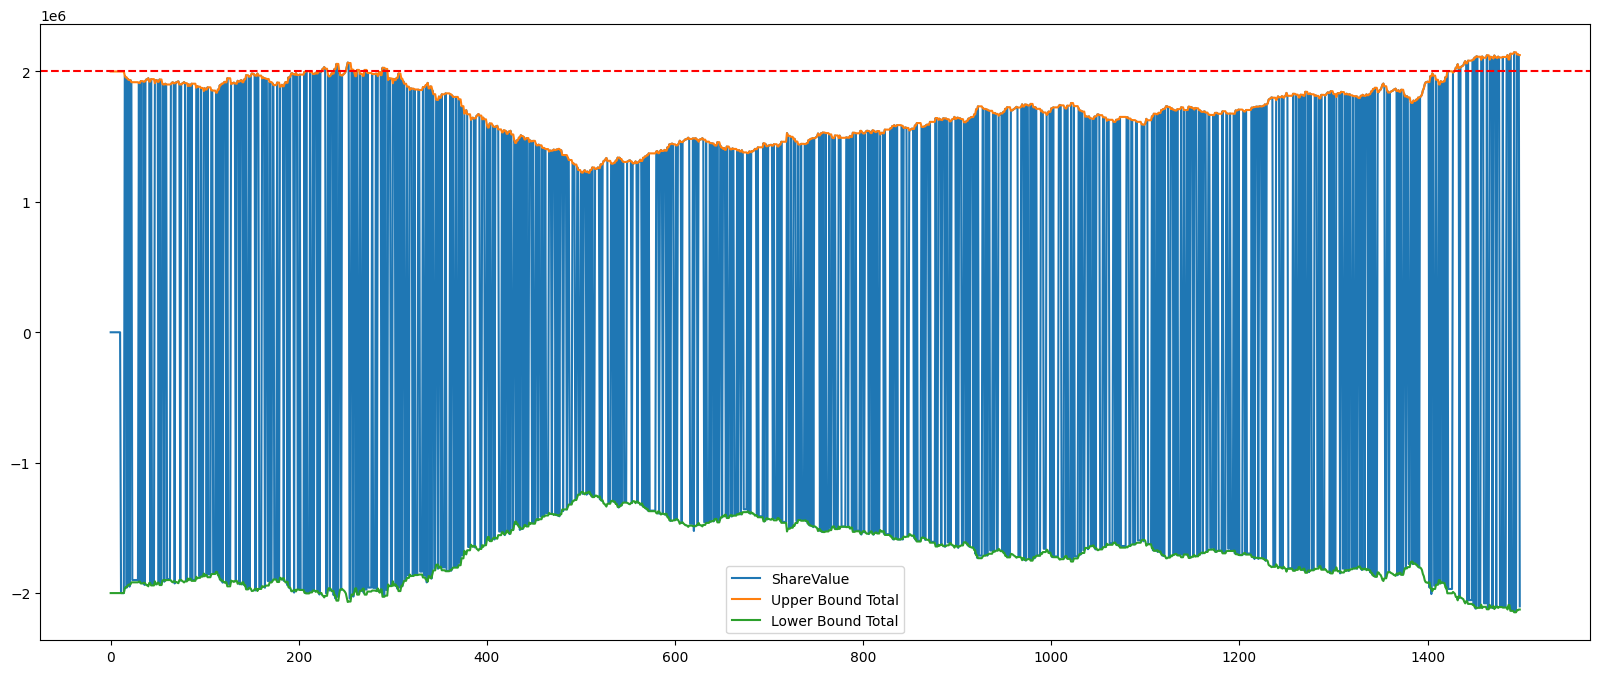

In [53]:
plt.figure(figsize=(20,8))

plt.plot(OrderTracking3['StockValue'],label='ShareValue')
plt.plot(OrderTracking3['TotalValue(Leverage)'],label='Upper Bound Total')
plt.plot(-OrderTracking3['TotalValue(Leverage)'],label='Lower Bound Total')

plt.axhline(y=2000000,color='red',linestyle='--')
plt.legend()
plt.show()